In [100]:
# Final Capstone Project – Credit Card Fraud Detection

# This notebook presents the complete analysis and
# modeling workflow for detecting fraudulent credit card transactions.
# It includes data preprocessing, handling class
# imbalance with SMOTE, and building three classification models:
# Logistic Regression, Random Forest, and XGBoost.
# The models are evaluated using precision, recall,
# and F1-score to determine the most effective approach for identifying fraud.

In [130]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [132]:
# Load the credit card dataset from the dataset folder
df = pd.read_csv("dataset/creditcard.csv")

In [134]:
# Display basic info
print("Shape of the dataset:", df.shape)
df.info()

Shape of the dataset: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

In [136]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


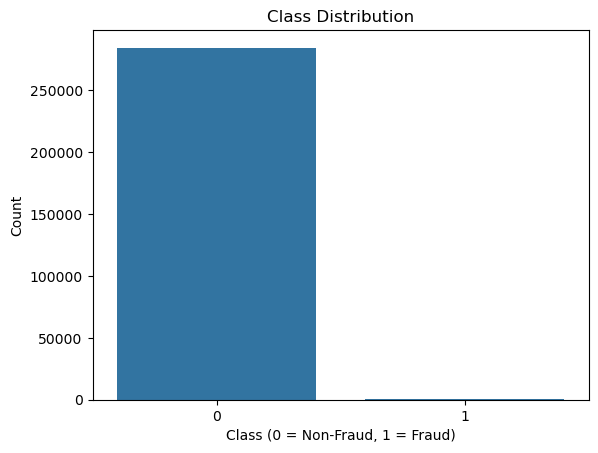

In [138]:
# Show class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

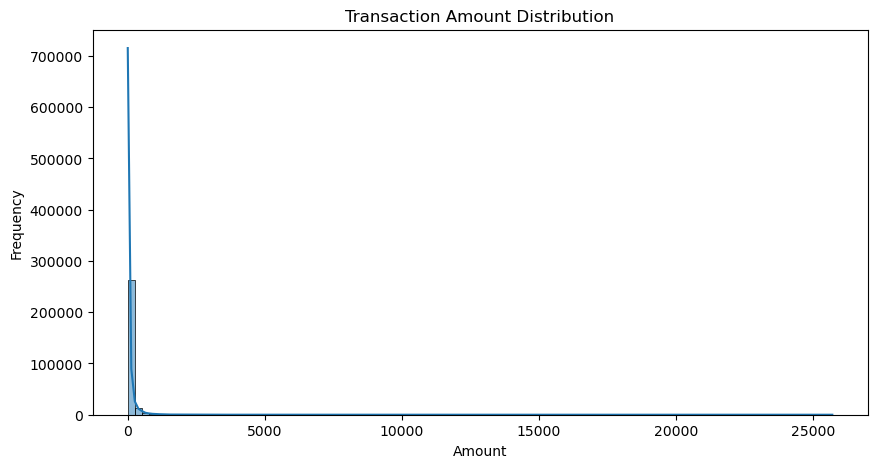

In [140]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

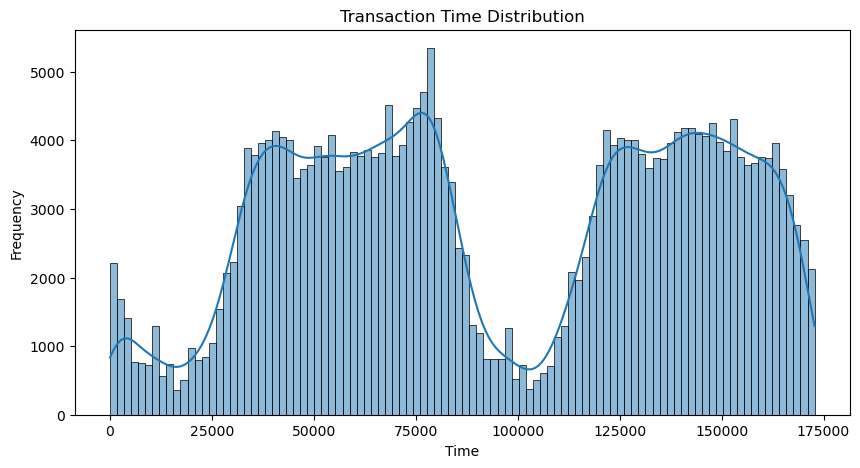

In [142]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

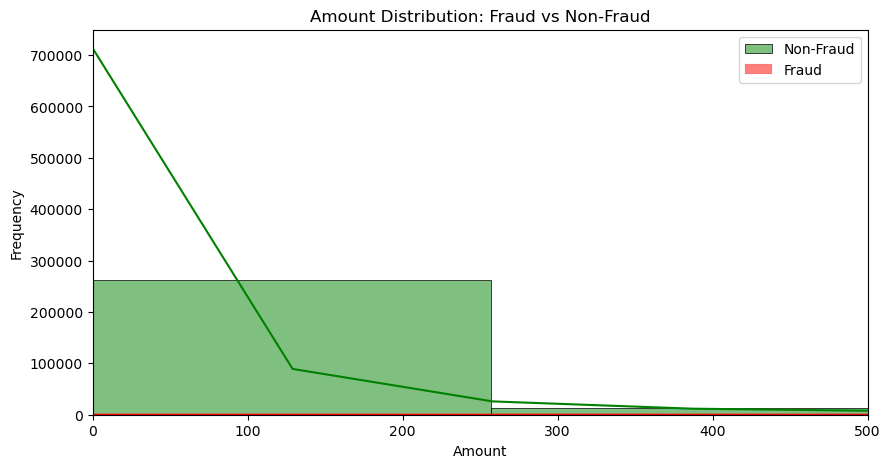

In [144]:
# Compare fraud and non-fraud transaction amounts
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], color='green', label='Non-Fraud', bins=100, kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], color='red', label='Fraud', bins=100, kde=True)
plt.title("Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(0, 500)
plt.show()

In [150]:
# Scale 'Amount' and 'Time' using StandardScaler
df_scaled = df.copy()
df_scaled[['Amount', 'Time']] = StandardScaler().fit_transform(df[['Amount', 'Time']])

# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [155]:
import warnings
warnings.filterwarnings("ignore")
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Initialize classifiers
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [169]:
# Define a reusable evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Logistic Regression Evaluation
Confusion Matrix:
 [[83058  2091]
 [ 6687 78753]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



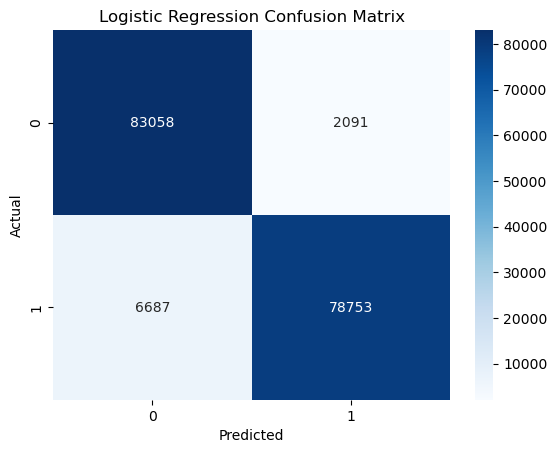

In [171]:
# Evaluate each model
evaluate_model("Logistic Regression", y_test, y_pred_logreg)


Random Forest Evaluation
Confusion Matrix:
 [[85132    17]
 [    0 85440]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



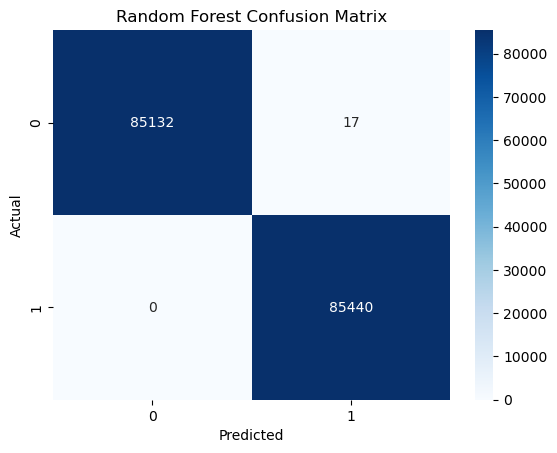

In [173]:
evaluate_model("Random Forest", y_test, y_pred_rf)


XGBoost Evaluation
Confusion Matrix:
 [[85097    52]
 [    0 85440]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



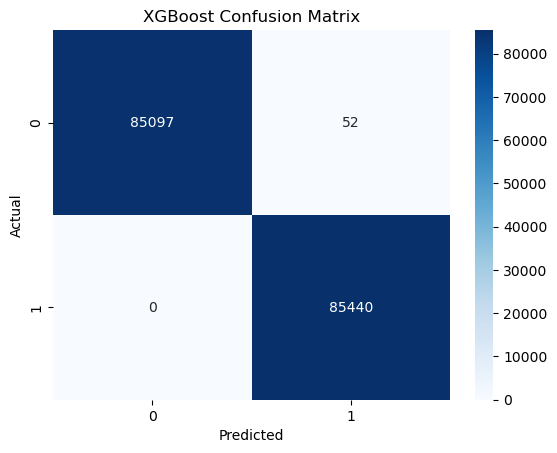

In [175]:
evaluate_model("XGBoost", y_test, y_pred_xgb)

In [177]:
# Build performance comparison table
performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        (y_pred_logreg == y_test).mean(),
        (y_pred_rf == y_test).mean(),
        (y_pred_xgb == y_test).mean()
    ],
    "Precision (Fraud)": [
        classification_report(y_test, y_pred_logreg, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision']
    ],
    "Recall (Fraud)": [
        classification_report(y_test, y_pred_logreg, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall']
    ],
    "F1 Score (Fraud)": [
        classification_report(y_test, y_pred_logreg, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score']
    ]
})

In [179]:
# Display performance comparison table
print("\nModel Performance Summary:")
print(performance)


Model Performance Summary:
                 Model  Accuracy  Precision (Fraud)  Recall (Fraud)  \
0  Logistic Regression  0.948543           0.974135        0.921735   
1        Random Forest  0.999900           0.999801        1.000000   
2              XGBoost  0.999695           0.999392        1.000000   

   F1 Score (Fraud)  
0          0.947211  
1          0.999901  
2          0.999696  


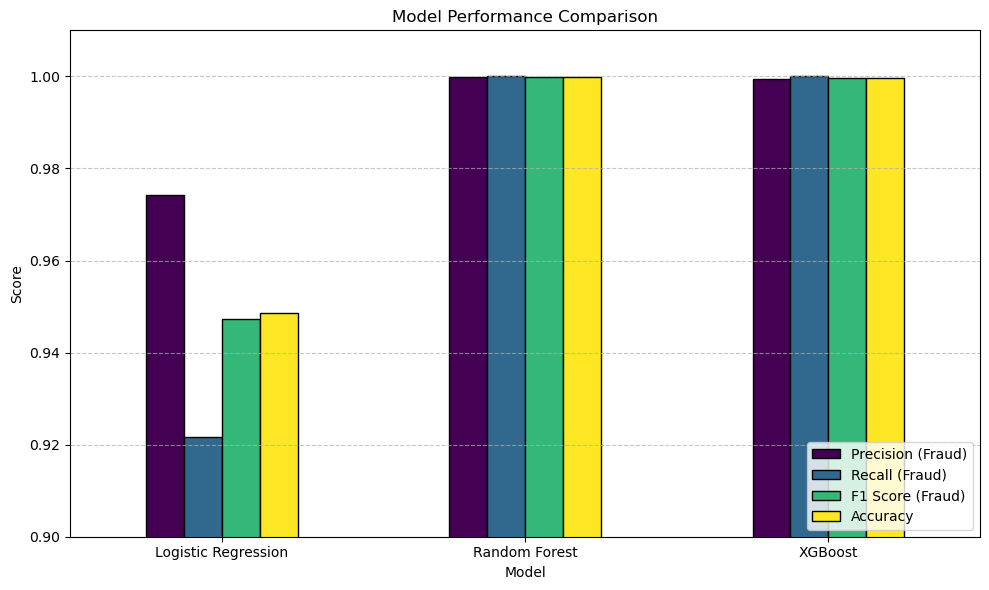

In [181]:
# Plot performance comparison
performance.set_index("Model")[["Precision (Fraud)", "Recall (Fraud)", "F1 Score (Fraud)", "Accuracy"]].plot(
    kind="bar", figsize=(10,6), colormap="viridis", edgecolor="black"
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()